In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load Data
from sklearn.datasets import load_breast_cancer
raw_data = load_breast_cancer()

In [3]:
cancer_data = pd.DataFrame(raw_data['data'], columns=raw_data['feature_names'])
cancer_data['target'] = raw_data['target']

In [4]:
cancer_data.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [5]:
cancer_data.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [6]:
# features and label
X = cancer_data.drop('target', axis=1)
y = cancer_data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(69)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
def get_classifier_metrics(classifier, X, y, X_train, X_test, y_train, y_test, nfolds):
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    print('Accuracy')
    print('-----------------------')
    print(f'Train Data Accuracy Score: {classifier.score(X_train, y_train)*100:.2f}%')
    print(f'Test Data Accuracy Score: {classifier.score(X_test, y_test)*100:.2f}%')

    print()
    print('Cross Validation Score')
    print('-----------------------')
    cvs = cross_val_score(classifier, X_train, y_train)
    print(f'Cross Validation Score test data %: {np.round(cvs*100)}')
    print(f'Cross Validation Score test data mean: {np.round(cvs.mean()*100)}%')

    print()
    print('ROC Curve and AUC')
    print('-----------------------')
    y_preds = classifier.predict_proba(X_test)
    y_preds_positive = y_preds[:,1]
    print(f'Area Under Curve test data: {np.round(roc_auc_score(y_test, y_preds_positive)*100):.2f}%')
    print()
    print('ROC Curve')
    print()

    fpr, tpr, thresholds = roc_curve(y_test, y_preds_positive)
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(5,5))

    ax.plot(fpr, tpr, label='ROC Curve', color='orange')
    ax.plot([0,1],[0,1], linestyle='-.', label='Guess', color='red')

    ax.set(title='ROC Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')

    plt.show()

    print()
    print('Confusion Matrix')
    print('-----------------------')
    y_preds = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_preds)
    display(cm)
    display(pd.crosstab(y_test,y_preds, rownames=['Actuals'], colnames=['Predictions']))
    sns.heatmap(cm, annot=True, fmt=".1f")

    plt.show()


Accuracy
-----------------------
Train Data Accuracy Score: 100.00%
Test Data Accuracy Score: 99.12%

Cross Validation Score
-----------------------
Cross Validation Score test data %: [93. 93. 98. 99. 93.]
Cross Validation Score test data mean: 95.0%

ROC Curve and AUC
-----------------------
Area Under Curve test data: 100.00%

ROC Curve



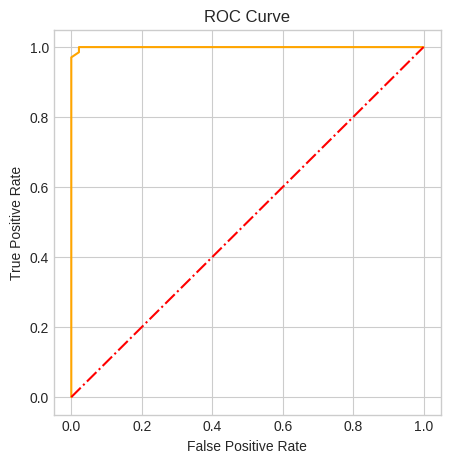


Confusion Matrix
-----------------------


array([[45,  1],
       [ 0, 68]])

Predictions,0,1
Actuals,,
0,45,1
1,0,68


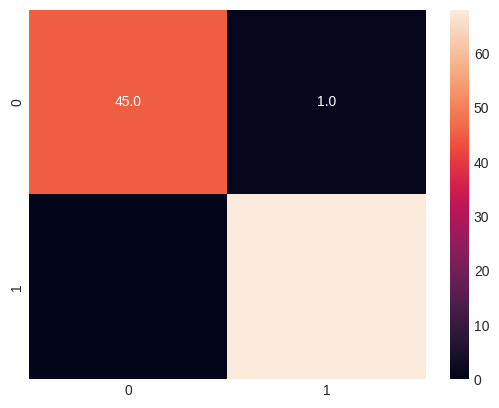

In [13]:
get_classifier_metrics(clf, X, y, X_train, X_test, y_train, y_test, 10)